Hometask 4:
Choose one linear and one non-linear dimension reduction method

Run them on your data (It is preferable to use seaborn and plotly to visualize results)

Justify the choice of the number of components / dimensions and explain them


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('normal_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18097 entries, 0 to 18096
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mol_id  18097 non-null  object 
 1   smiles  18097 non-null  object 
 2   A       18097 non-null  float64
 3   B       18097 non-null  float64
 4   C       18097 non-null  float64
 5   mu      18097 non-null  float64
 6   alpha   18097 non-null  float64
 7   homo    18097 non-null  float64
 8   lumo    18097 non-null  float64
 9   gap     18097 non-null  float64
 10  r2      18097 non-null  float64
 11  zpve    18097 non-null  float64
 12  u0      18097 non-null  float64
 13  u298    18097 non-null  float64
 14  h298    18097 non-null  float64
 15  g298    18097 non-null  float64
 16  cv      18097 non-null  float64
dtypes: float64(15), object(2)
memory usage: 2.3+ MB


# *Линейный* = Principal Component Analysis = ищет линейные комбинации исходных признаков, называемых главными компонентами, для создания нового набора признаков (**СЖИМАЕТ**)

# *Нельнейный* = Kernel Principal Component Analysis = ищет нелинейные отношения между признаками (**РАСШИРЯЕТ**)

In [4]:
pca = PCA()
pca = pca.fit(df.iloc[:, 2:])
pcs = pca.transform(df.iloc[:, 2:])

# Scree Plot *(как много информации сохраняется при различном количестве главных компонент)*

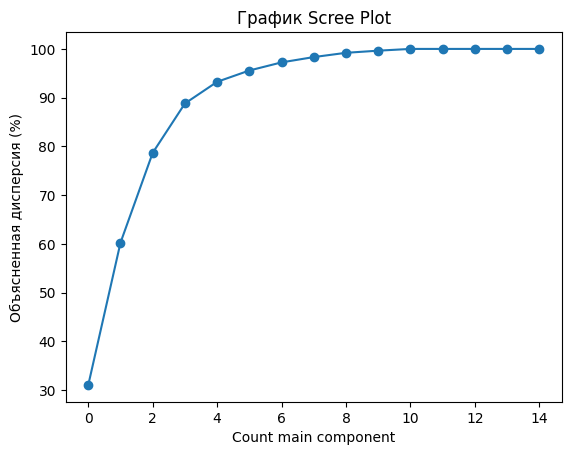

In [5]:
explained_variance_ratio_pca = pca.explained_variance_ratio_

# Scree Plot - график каменистой осыпи
plt.plot(np.cumsum(explained_variance_ratio_pca[:100]) * 100, marker='o', linestyle='-')
plt.xlabel('Count main component')
plt.ylabel('Объясненная дисперсия (%)')
plt.title('График Scree Plot')
plt.show()

селектед - разделение данных

In [6]:
X = df.drop('gap', axis=1)
X = X.select_dtypes(exclude=['object'])
y = df['gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [7]:
#оптимальное кол-во компонент
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio_pca)

In [8]:
# Вычислим оптимальное кол-во компонент
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio_pca)

In [9]:
n_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1  #95% дисперсии объясняются n_components колич.

In [10]:
n_components

6

PCA будет извлекать 6 главных компонентов

In [11]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

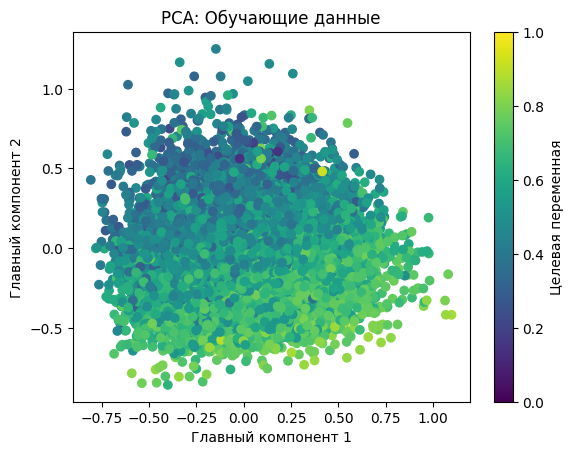

In [12]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.title('PCA: Обучающие данные')
plt.colorbar(label='Целевая переменная')
plt.show()

# KPCA

In [13]:
# # Определение ядра и его параметров
# param_grid = {
#     "kernel": ["rbf", "poly"],
#     "gamma": [0.1, 1.0, 10.0],
#     "degree": [2, 3, 4]
# }

In [14]:
# #scoring function
# def dummy_score_function(estimator, X, y=None):
#     return 0

# # Define the parameter grid
# param_grid = {
#     "kernel": ["rbf", "poly"],
#     "gamma": [0.1, 1.0, 10.0],
#     "degree": [2, 3, 4]
# }

In [15]:
# # Создание объекта KPCA
# kpca = KernelPCA()

In [16]:
# grid_search = GridSearchCV(kpca, param_grid, cv=3, scoring=make_scorer(dummy_score_function))
# grid_search.fit(df.iloc[:, 2:])

In [17]:
# # Преобразование данных с использованием оптимальных параметров
# kpca_transformed = grid_search.transform(df.iloc[:, 2:])

In [18]:
from sklearn.decomposition import KernelPCA

In [19]:
# Создаем объект KernelPCA
kpca = KernelPCA()

In [20]:
# Убедимся, что df содержит только числовые данные
numeric_df = df.select_dtypes(include=[np.number])

In [21]:
# Применяем KernelPCA только к первым 200 строкам данных
kpca_transformed = kpca.fit_transform(numeric_df.iloc[:200, :])

In [22]:
# Применяем KernelPCA к следующим 200 строкам данных
kpca_transformed_next = kpca.fit_transform(numeric_df.iloc[200:400, :])


In [23]:
# Применяем KernelPCA к следующим 200 строкам данных
kpca_transformed_next1 = kpca.fit_transform(numeric_df.iloc[400:600, :])


In [24]:
# Применяем KernelPCA к следующим 200 строкам данных
kpca_transformed_next2 = kpca.fit_transform(numeric_df.iloc[600:800, :])


In [25]:
# Применяем KernelPCA к следующим 200 строкам данных
kpca_transformed_next3 = kpca.fit_transform(numeric_df.iloc[800:1000, :])

In [26]:
# Применяем KernelPCA к следующим 200 строкам данных
kpca_transformed_next4 = kpca.fit_transform(numeric_df.iloc[1000:1500, :])

In [27]:
# Применяем KernelPCA к следующим 200 строкам данных
kpca_transformed_next5 = kpca.fit_transform(numeric_df.iloc[1500:2000, :])

In [28]:
# Применяем KernelPCA к следующим 200 строкам данных
kpca_transformed_next6 = kpca.fit_transform(numeric_df.iloc[2000:5000, :])

In [29]:
# Применяем KernelPCA к следующим 200 строкам данных
kpca_transformed_next7 = kpca.fit_transform(numeric_df.iloc[5000:10000, :])

In [30]:
# Применяем KernelPCA к следующим 200 строкам данных
kpca_transformed_next8 = kpca.fit_transform(numeric_df.iloc[10000:15000, :])

In [31]:
# Применяем KernelPCA к следующим 200 строкам данных
kpca_transformed_next9 = kpca.fit_transform(numeric_df.iloc[15000:20000, :])

In [32]:
# Объединяем результаты применения KernelPCA
kpca_transformed_combined = np.concatenate((kpca_transformed, kpca_transformed_next, kpca_transformed_next1, kpca_transformed_next2, kpca_transformed_next3, kpca_transformed_next4, kpca_transformed_next5, kpca_transformed_next6, kpca_transformed_next7, kpca_transformed_next8, kpca_transformed_next9), axis=0)

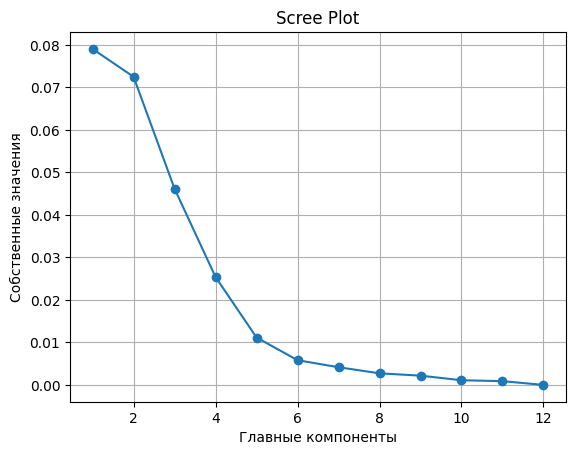

In [33]:
# Рассчитываем собственные значения для каждой главной компоненты
eigenvalues = np.linalg.eigvals(np.cov(kpca_transformed_combined.T))

# Сортируем собственные значения в порядке убывания
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Визуализируем Scree Plot
plt.plot(np.arange(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o')
plt.xlabel('Главные компоненты')
plt.ylabel('Собственные значения')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


In [34]:
kpca = KernelPCA(n_components=6)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

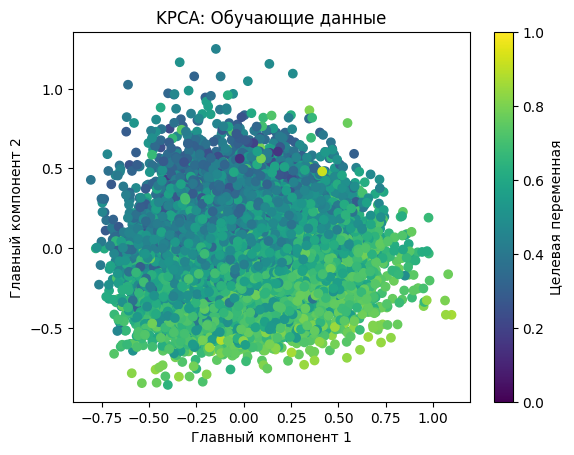

In [35]:
plt.scatter(X_train_kpca[:, 0], X_train_kpca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Главный компонент 1')
plt.ylabel('Главный компонент 2')
plt.title('KPCA: Обучающие данные')
plt.colorbar(label='Целевая переменная')
plt.show()

In [37]:
pca = PCA(n_components=6)
pca_data = pca.fit_transform(df.iloc[:, 2:])
pca_data = pd.DataFrame(pca_data)
pca_data.to_csv('pca_data.csv', index=False)

kpca = KernelPCA(n_components=6)
kpca_data = kpca.fit_transform(df.iloc[:, 2:])
kpca_data = pd.DataFrame(kpca_data)
kpca_data.to_csv('kpca_data.csv', index=False)

